In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 
sb.set(style='whitegrid')

In [2]:
data = pd.read_csv('C:\\Users\\Doctalk .LAPTOP-29R0CQPH\\DATASET\\Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sutton, Mr. Frederick",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


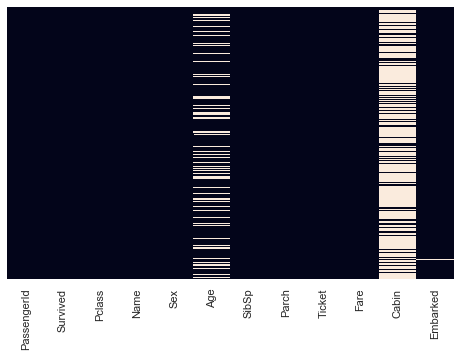

In [4]:
plt.figure(figsize=(8,5))
sb.heatmap(data.isnull(),yticklabels= False, cbar=False)

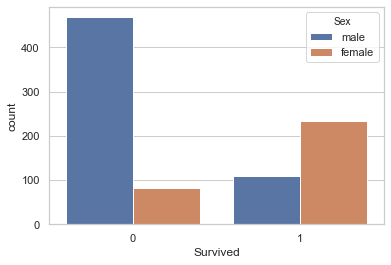

In [5]:
sb.countplot(x='Survived', data= data, hue='Sex')

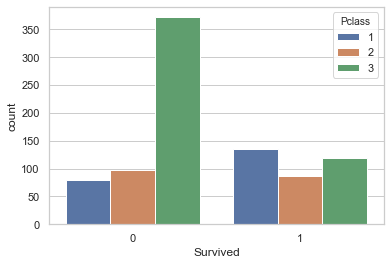

In [6]:
sb.countplot(x= 'Survived', hue='Pclass', data= data)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


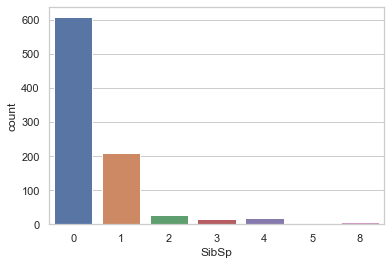

In [8]:
sb.countplot(x='SibSp', data=data)

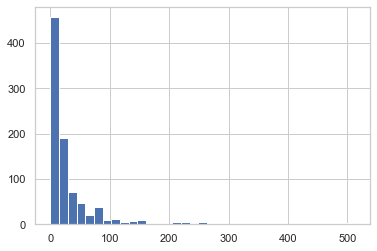

In [9]:
data['Fare'].hist(bins=35, )

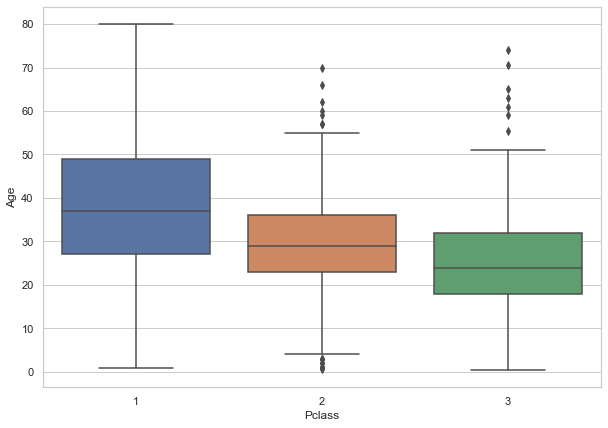

In [10]:
plt.figure(figsize=(10,7))
sb.boxplot(x='Pclass', y="Age", data=data)

In [11]:
data.drop(['Cabin', 'Name','PassengerId', 'Ticket'],axis=1, inplace= True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
def impute(cols):
    Age= cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
data['Age']=data[['Age', 'Pclass']].apply(impute, axis=1)

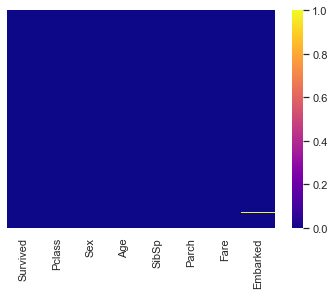

In [14]:
sb.heatmap(data.isnull(), yticklabels=False, cmap='plasma')

In [15]:
data.dropna(inplace=True)

In [16]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [17]:
X= data.iloc[:, 1: ]
y= data.Survived

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41)

In [33]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (666, 8)
X_test shape: (223, 8)
y_train shape: (666,)
y_test shape: (223,)


In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train, y_train)
y_predict= logmodel.predict(X_test)
accuracy_score(y_test,y_predict)

C:\Users\Doctalk .LAPTOP-29R0CQPH\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.820627802690583

In [36]:
confusion_matrix(y_test,y_predict)

array([[122,  12],
       [ 28,  61]], dtype=int64)

In [37]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Survived,,
0,122,12
1,28,61


In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score

In [39]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       134
           1       0.84      0.69      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [40]:
precision_score(y_test,y_predict)

0.8356164383561644

In [41]:
recall_score(y_test,y_predict)

0.6853932584269663

# `Random Forest`

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model_2 = RandomForestClassifier(random_state=140)
model_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=140,
                       verbose=0, warm_start=False)

In [44]:
y_predict_2 = model_2.predict(X_test)
Random_forest_acc= accuracy_score(y_test, y_predict_2)

In [45]:
Random_forest_acc

0.8026905829596412

# XGBOOST

In [46]:
from xgboost import XGBClassifier

In [47]:
model_3= XGBClassifier(learning_rate= 0.1, random_state=10, n_estimators=200)
model_3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [48]:
y_predict_3= model_3.predict(X_test)
XGBOOST_accu= accuracy_score(y_test, y_predict_3)

In [49]:
XGBOOST_accu

0.8071748878923767